In [18]:
import pandas as pd
import numpy as np
import random
import os
from os import listdir
import cv2
import seaborn as sns
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
BCa_img = glob('C:/LHL/Final_project/dir/**/*.png', recursive = True)
for img in BCa_img[:2]:
    print(img)

C:/LHL/Final_project/dir\0\10253_idx5_x1001_y1001_class0.png
C:/LHL/Final_project/dir\0\10253_idx5_x1001_y1051_class0.png


In [9]:
neg_img = []
pos_img = []

for img in BCa_img :
    if img[-5] == '0' :
        neg_img.append(img)
    
    elif img[-5] == '1' :
        pos_img.append(img)

In [11]:
total_neg = len(neg_img)
total_pos = len(pos_img)
        
total_img_num = total_neg + total_pos
        
print('Number of Negative Images: {}' .format(total_neg))
print('Number of Postive Images: {}' .format(total_pos))
print('Total Number of Images : {}' .format(total_img_num))

Number of Negative Images: 198738
Number of Postive Images: 78786
Total Number of Images : 277524


In [12]:
from matplotlib.image import imread
import cv2

sampel_neg_img = random.sample(neg_img, len(pos_img))
sampel_pos_img = random.sample(pos_img, len(pos_img))

non_img_arr = []
can_img_arr = []

for img in sampel_neg_img:
        
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])
    
for img in sampel_pos_img:
    
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

In [13]:
X = []
y = []

breast_img_arr = np.concatenate((non_img_arr, can_img_arr))
random.shuffle(breast_img_arr)

for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)
    
X = np.array(X)
y = np.array(y)

print('X shape : {}' .format(X.shape))

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


X shape : (157572, 50, 50, 3)


In [15]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_predict, y_train, y_true = train_test_split(X, y, test_size = 0.3, random_state = 7)

rate = 0.5
num = int(X.shape[0] * rate)

X_test = X_train[num:]
X_train = X_train[:num]

y_test = y_train[num:]
y_train = y_train[:num]

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
y_true = to_categorical(y_true, 2)

In [20]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))

model.add(Dropout(0.5))
model.add(Dense(2, activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 25, 25, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 64)       

In [21]:
from keras.optimizers import Adam

Adam = Adam(learning_rate = 0.0001)
model.compile(loss = 'binary_crossentropy', optimizer = Adam, metrics = ['accuracy'])

In [22]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 25, batch_size = 50)

Epoch 1/25
1576/1576 [==============================] - 27s 12ms/step - loss: 0.7056 - accuracy: 0.8417 - val_loss: 0.4726 - val_accuracy: 0.8482
Epoch 2/25
1576/1576 [==============================] - 18s 12ms/step - loss: 0.3764 - accuracy: 0.8453 - val_loss: 0.4710 - val_accuracy: 0.8482
Epoch 3/25
1576/1576 [==============================] - 18s 12ms/step - loss: 0.3522 - accuracy: 0.8454 - val_loss: 0.4001 - val_accuracy: 0.8482
Epoch 4/25
1576/1576 [==============================] - 18s 12ms/step - loss: 0.3363 - accuracy: 0.8456 - val_loss: 0.3755 - val_accuracy: 0.8567
Epoch 5/25
1576/1576 [==============================] - 18s 12ms/step - loss: 0.3263 - accuracy: 0.8459 - val_loss: 0.3583 - val_accuracy: 0.8658
Epoch 6/25
1576/1576 [==============================] - 18s 12ms/step - loss: 0.3162 - accuracy: 0.8478 - val_loss: 0.3708 - val_accuracy: 0.8482
Epoch 7/25
1576/1576 [==============================] - 19s 12ms/step - loss: 0.3061 - accuracy: 0.8507 - val_loss: 0.3297 -

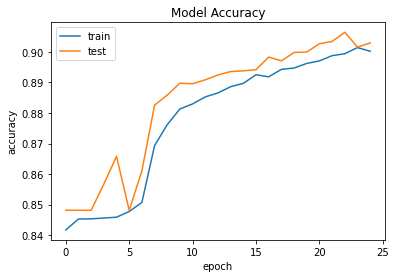

In [23]:
# accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

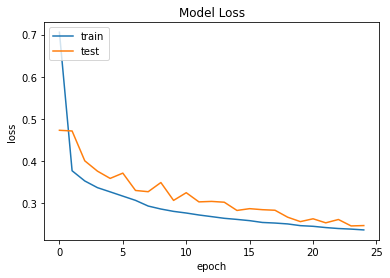

In [24]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

985/985 [==============================] - 3s 3ms/step


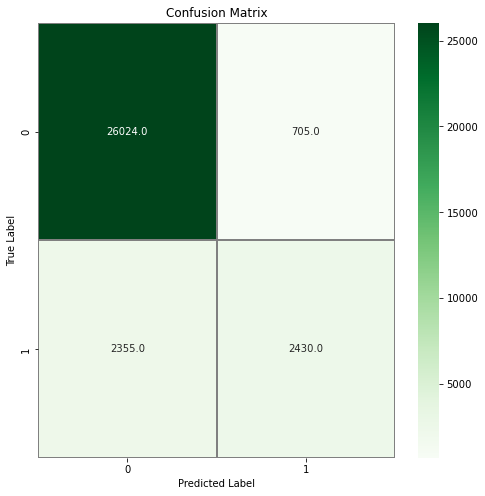

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()